<div style='background-color:orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align:center ; top-padding:5px'>
        Table of Contents
    </h1></i></u></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#identifycols'>Identify Columns For Exploration</a>
    <li><a href='#questions'>Questions to Answer</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<div style='background-color:orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [1]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# stats
from scipy import stats

# .py files
import wrangle as w

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default matplotlib plot style to 'bmh'
# mpl.style.use('bmh')

<div style='background-color:orange'>
<a id='identifycols'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Identify Columns For Exploration
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [3]:
# Get the master filtered dataset
master = w.wrangle()
master.head(3)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,charge,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant,crash_datetime
0,16189632,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,OPERATE UNREGISTERED MOTOR VEHICLE,TX52Q80UKZPL,37,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-01 11:23:00
1,16203470,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,"NO CLASS ""M"" LICENSE",TX52QD0NAP34,30,H - HISPANIC,1 - MALE,"3 - WORN, NOT DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-04 13:16:00
2,16192023,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,HARRIS COUNTY SHERIFF'S OFFICE,False,no data,no data,...,NO CHARGES,no data,21,W - WHITE,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-05 20:45:00


<div style='background-color:orange'>
<a id='questions'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Questions to Answer
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#seasonality'>Seasonality</a>
    <li><a href='#question2'>Question 2</a>
    <li><a href='#question3'>Question 3</a>
    <li><a href='#question4'>Question 4</a>
    </li>
</div>

<a id='question1'></a>
<h3><b><i>
    Question 1
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

1. Does time of day matter?

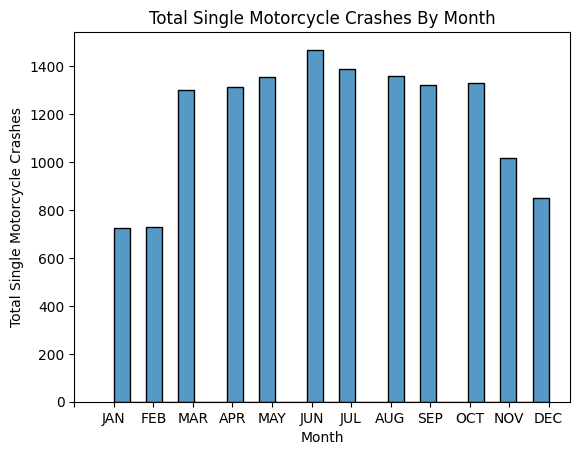

In [15]:
sns.histplot(data=master, x='crash_month')
plt.title('Total Single Motorcycle Crashes By Month')
plt.xlabel('Month')
plt.xticks(ticks=range(13), labels=['', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.ylabel('Total Single Motorcycle Crashes')
plt.show()

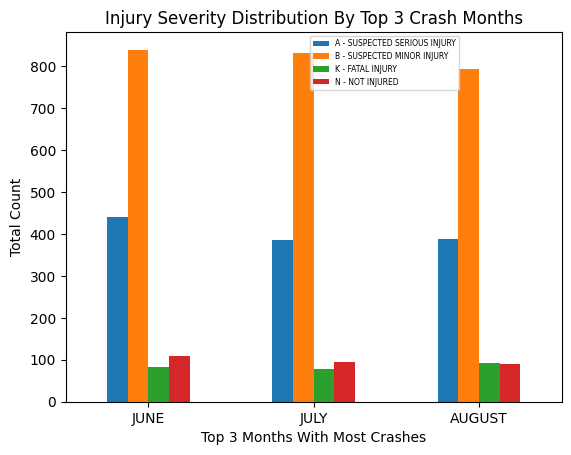

In [45]:
top3months = master[master.crash_datetime.dt.month.isin([6, 7, 8])]
ct = pd.crosstab(top3months.crash_datetime.dt.month, top3months.person_injury_severity)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Top 3 Crash Months')
plt.xlabel('Top 3 Months With Most Crashes')
plt.xticks(ticks=range(3), labels=['JUNE', 'JULY', 'AUGUST'], rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 5.5})  # Set the size of the legend
legend.set_bbox_to_anchor((0.8, 1))
plt.show()

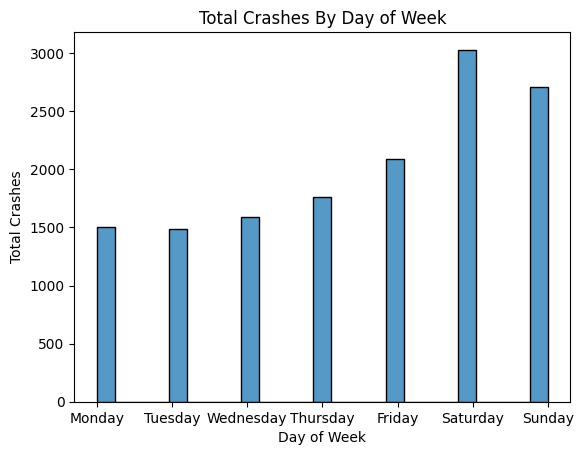

In [51]:
sns.histplot(data=master, x=master.crash_datetime.dt.dayofweek)
plt.title('Total Crashes By Day of Week')
plt.xlabel('Day of Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Total Crashes')
plt.show()

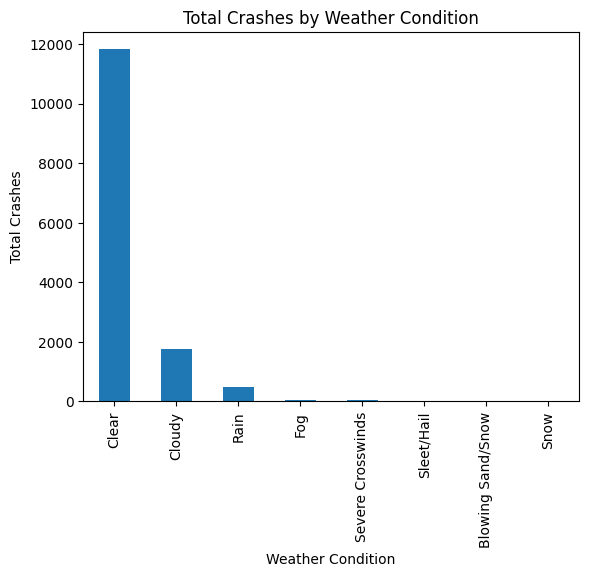

In [109]:
weather_stuff = master[master.weather_condition.str.startswith(('1', '2', '3', '4', '5', '6', '7', '8'))]
weather_stuff.weather_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.xticks(ticks=range(8), labels=['Clear', 'Cloudy', 'Rain', 'Fog', 'Severe Crosswinds', 'Sleet/Hail', 'Blowing Sand/Snow', 'Snow'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

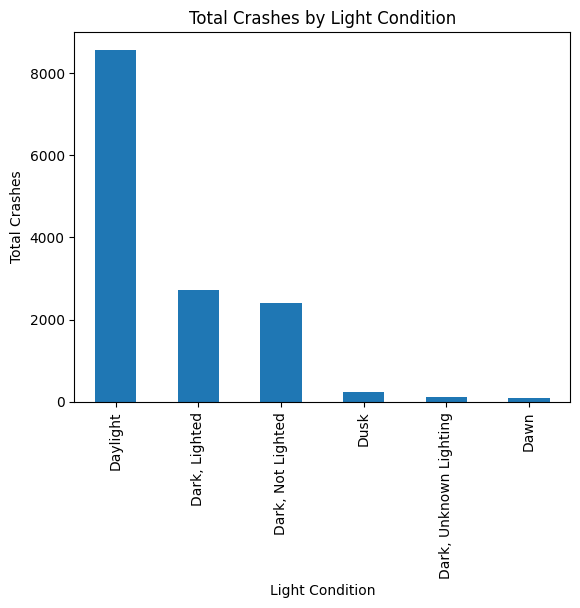

In [111]:
light_stuff = master[master.light_condition.str.startswith(('1', '2', '3', '4', '5', '6'))]
light_stuff.light_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Light Condition')
plt.xlabel('Light Condition')
plt.xticks(ticks=range(6), labels=['Daylight', 'Dark, Lighted', 'Dark, Not Lighted', 'Dusk', 'Dark, Unknown Lighting', 'Dawn'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

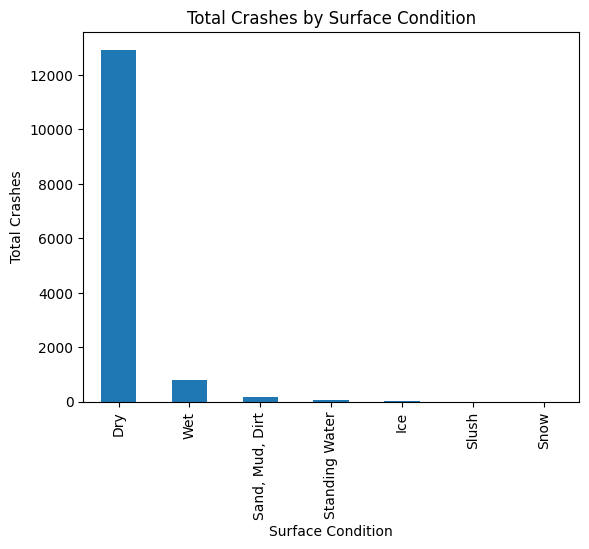

In [113]:
surface_stuff = master[master.surface_condition.str.startswith(('1', '2', '3', '4', '5', '6', '7'))]
surface_stuff.surface_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Surface Condition')
plt.xlabel('Surface Condition')
plt.xticks(ticks=range(7), labels=['Dry', 'Wet', 'Sand, Mud, Dirt', 'Standing Water', 'Ice', 'Slush', 'Snow'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

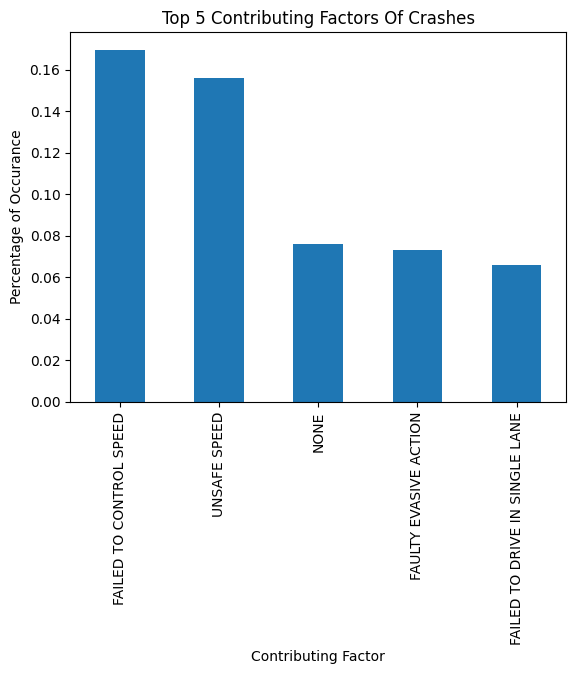

In [86]:
cont_factor = master[~master.contributing_factors.str.startswith('OTHER')]
cont_factor.contributing_factors.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Contributing Factors Of Crashes')
plt.xlabel('Contributing Factor')
plt.ylabel('Percentage of Occurance')
plt.show()

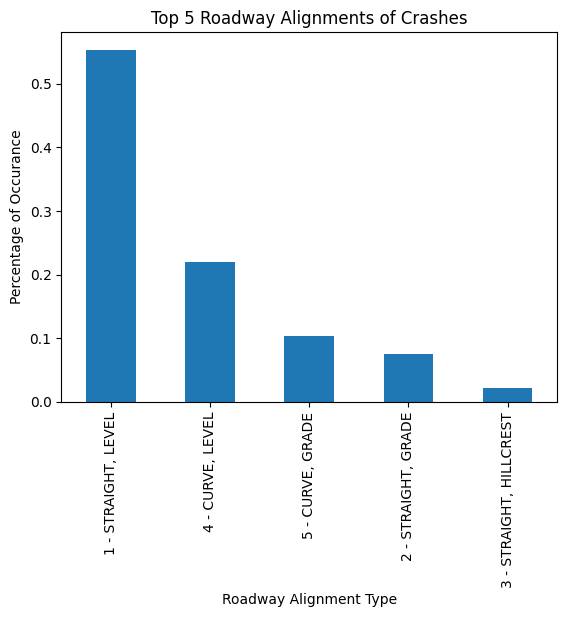

In [90]:
master.roadway_alignment.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Roadway Alignments of Crashes')
plt.xlabel('Roadway Alignment Type')
plt.ylabel('Percentage of Occurance')
plt.show()

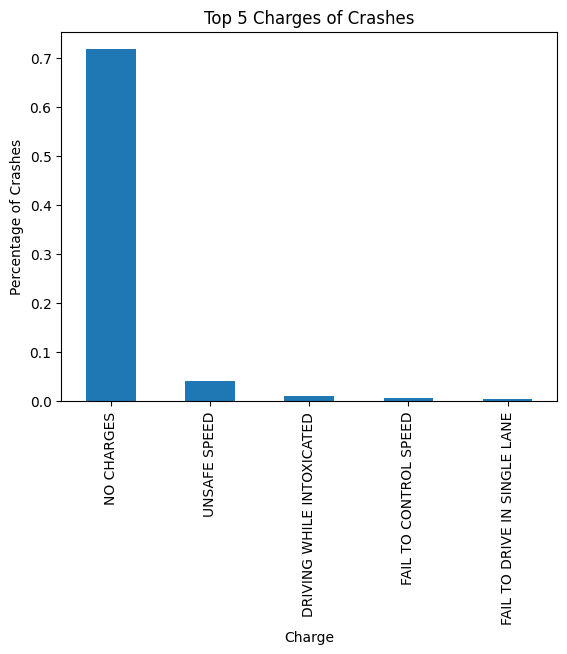

In [116]:
master.charge.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Charges of Crashes')
plt.xlabel('Charge')
plt.ylabel('Percentage of Crashes')
plt.show()

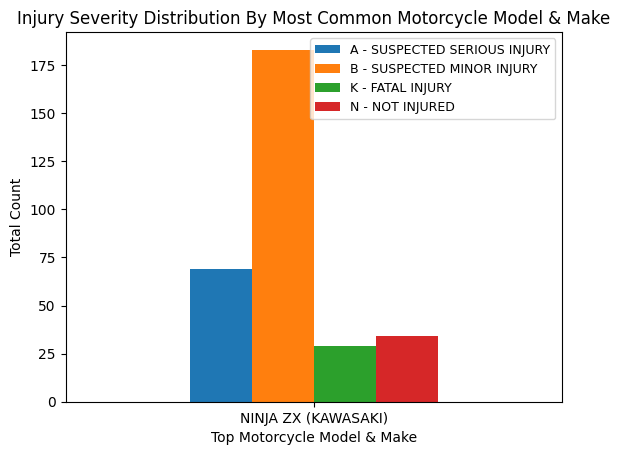

In [139]:
top_makemodel = master[master.vehicle_model_name == 'NINJA ZX (KAWASAKI)']
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.person_injury_severity)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
#legend.set_bbox_to_anchor((0.8, 1))
plt.show()

In [141]:
top_makemodel.vehicle_defect_1.value_counts()

vehicle_defect_1
no data                                300
98 - OTHER  (EXPLAIN IN NARRATIVE)       6
12 - DEFECTIVE OR SLICK TIRES            3
10 - DEFECTIVE OR NO VEHICLE BRAKES      3
11 - DEFECTIVE STEERING MECHANISM        3
Name: count, dtype: int64

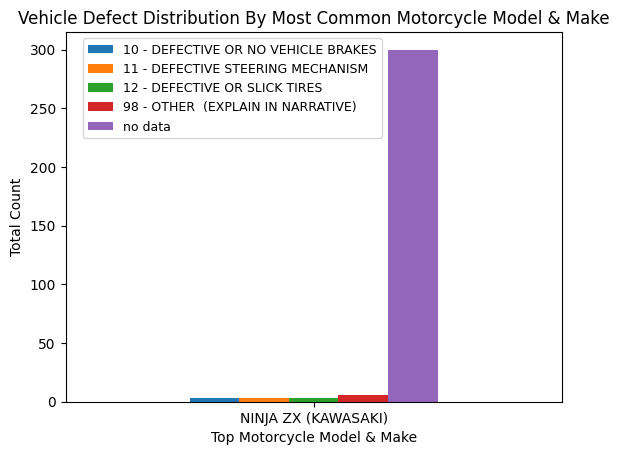

In [157]:
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.vehicle_defect_1)
ax = ct.plot(kind='bar')
plt.title('Vehicle Defect Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
legend.set_bbox_to_anchor((0.65, 1))
plt.show()

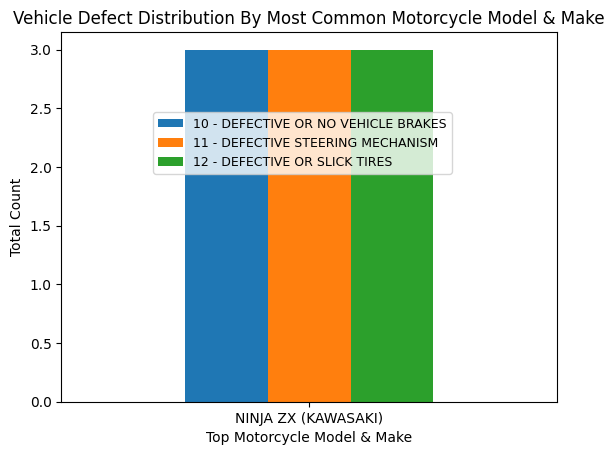

In [150]:
smaller_top_makemodel = top_makemodel[~top_makemodel.vehicle_defect_1.str.startswith(('no data', '98 - OTHER  (EXPLAIN IN NARRATIVE)'))]
ct = pd.crosstab(smaller_top_makemodel.vehicle_model_name, smaller_top_makemodel.vehicle_defect_1)
ax = ct.plot(kind='bar')
plt.title('Vehicle Defect Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
legend.set_bbox_to_anchor((0.8, 0.8))
plt.show()

In [ ]:
top_makemodel = master[master.vehicle_model_name == 'NINJA ZX (KAWASAKI)']
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.vehicle_model_name)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
#legend.set_bbox_to_anchor((0.8, 1))
plt.show()

In [121]:
master.vehicle_model_name.value_counts()

vehicle_model_name
UNKNOWN (HARLEY-DAVIDSON)    1440
UNKNOWN (HONDA)               636
UNKNOWN (YAMAHA)              486
NINJA ZX (KAWASAKI)           315
UNKNOWN (SUZUKI)              307
                             ... 
XT200 (YAMAHA)                  1
FXEF (HARLEY-DAVIDSON)          1
BASHAN SCOOTER (BASHAN)         1
LT50 (SUZUKI)                   1
KM100 (KAWASAKI)                1
Name: count, Length: 974, dtype: int64

In [117]:
master.columns.to_list()

['crash_id',
 "$1000_damage_to_any_one_person's_property",
 'active_school_zone_flag',
 'adjusted_average_daily_traffic_amount',
 'adjusted_percentage_of_average_daily_traffic_for_trucks',
 'adjusted_roadway_part',
 'agency',
 'at_intersection_flag',
 'average_daily_traffic_amount',
 'average_daily_traffic_year',
 'case_id',
 'city',
 'contributing_factors',
 'control_section',
 'control_section_milepoint',
 'county',
 'crash_date',
 'crash_month',
 'crash_number',
 'crash_severity',
 'crash_time',
 'crash_year',
 'day_of_week',
 'dfo',
 'highway_alpha_suffix',
 'highway_lane_design',
 'highway_number',
 'highway_system',
 'hour_of_day',
 'inside_shoulder_width_on_divided_highway',
 'intersecting_highway_alpha_suffix',
 'intersecting_highway_number',
 'intersecting_highway_system',
 'intersecting_street_name',
 'intersection_related',
 'latitude',
 'left_curb_type',
 'left_shoulder_type',
 'left_shoulder_use',
 'left_shoulder_width',
 'light_condition',
 'longitude',
 'manner_of_collis

<div style='background-color:orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Miscellaneous
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>